# Transition path theory

In [1]:
from __future__ import print_function
import numpy as np
import pyemma
import matplotlib.pyplot as plt
%matplotlib inline

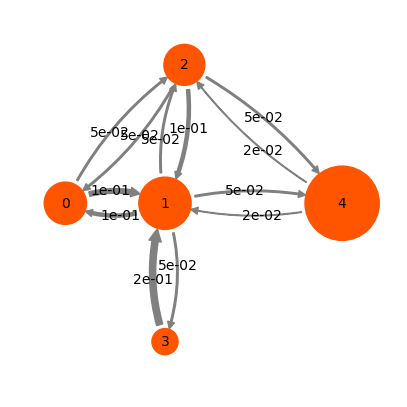

In [2]:
# Start with toy system
P = np.array([[0.8,  0.15, 0.05,  0.0,  0.0],
              [0.1,  0.75, 0.05, 0.05, 0.05],
              [0.05,  0.1,  0.8,  0.0,  0.05],
              [0.0,  0.2, 0.0,  0.8,  0.0],
              [0.0,  0.02, 0.02, 0.0,  0.96]])
M = pyemma.msm.markov_model(P)
#pos = np.array([[2.0,-1.5],[1,0],[2.0,1.5],[0.0,-1.5],[0.0,1.5]])
pos = np.array([[ 0., 0.], [ 0.36,  0.], [ 0.43,  0.5], [ 0.36, -0.5], [ 1.,  0.]])
pyemma.plots.plot_markov_model(M, pos=pos, max_height=5, max_width=5);

In [3]:
A = [0]
B = [4]
tpt = pyemma.msm.tpt(M, A, B)

**Flux matrix**: 
[[ 0.          0.00771792  0.00308717  0.          0.        ]
 [ 0.          0.          0.00308717  0.00257264  0.00720339]
 [ 0.          0.00257264  0.          0.          0.00360169]
 [ 0.          0.00257264  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
**forward committor**: 
[ 0.          0.35714286  0.42857143  0.35714286  1.        ]
**backward committor**: 
[ 1.          0.65384615  0.53125     0.65384615  0.        ]

**Gross flux illustration**: 


(<matplotlib.figure.Figure at 0x47edc18>, array([[ 0.  ,  0.  ],
        [ 0.36,  0.  ],
        [ 0.43,  0.5 ],
        [ 0.36, -0.5 ],
        [ 1.  ,  0.  ]]))

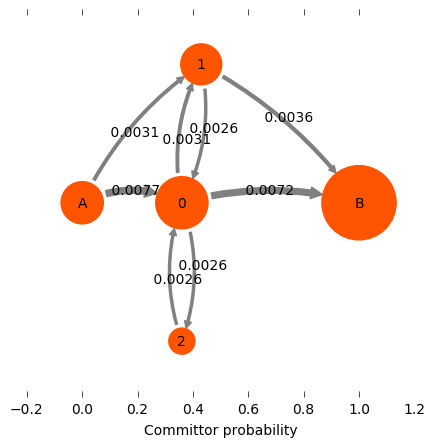

In [4]:
# get tpt gross flux
F = tpt.gross_flux
print('**Flux matrix**: ')
print(F)
print('**forward committor**: ')
print(tpt.committor)
print('**backward committor**: ')
print(tpt.backward_committor)
# we position states along the y-axis according to the commitor
#tptpos = np.array([tpt.committor, [0,0,0.5,-0.5,0]]).transpose()
print('\n**Gross flux illustration**: ')
pyemma.plots.plot_flux(tpt, pos=pos, arrow_label_format="%10.4f", attribute_to_plot='gross_flux', max_height=5, max_width=5)

**Net-Flux matrix**: 
[[  0.00000000e+00   7.71791768e-03   3.08716707e-03   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.14527845e-04   0.00000000e+00
    7.20338983e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    3.60169492e-03]
 [  0.00000000e+00   4.33680869e-19   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


(<matplotlib.figure.Figure at 0x9690f60>, array([[ 0.  ,  0.  ],
        [ 0.36,  0.  ],
        [ 0.43,  0.5 ],
        [ 0.36, -0.5 ],
        [ 1.  ,  0.  ]]))

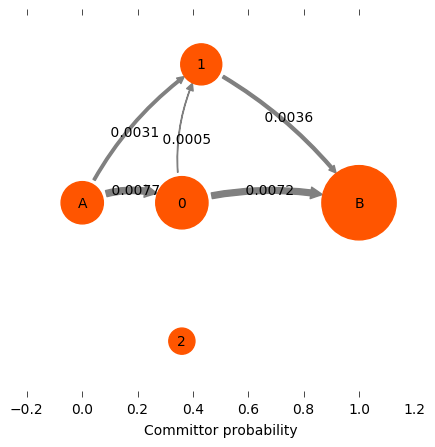

In [5]:
# get tpt net flux
Fp = tpt.net_flux
# or: tpt.flux (it's the same!)
print('**Net-Flux matrix**: ')
print(Fp)
# visualize
pyemma.plots.plot_flux(tpt, pos=pos, arrow_label_format="%10.4f", attribute_to_plot='net_flux', max_height=5, max_width=5)

In [6]:
print('Total TPT flux = ', tpt.total_flux)
print('Rate from TPT flux = ', tpt.rate)
print('A->B transition time = ', 1.0/tpt.rate)

Total TPT flux =  0.0108050847458
Rate from TPT flux =  0.0272727272727
A->B transition time =  36.6666666667


In [7]:
print('mfpt(0,4) = ', M.mfpt(0, 4))

mfpt(0,4) =  36.6666666667


(<matplotlib.figure.Figure at 0x96d6358>, array([[ 0.  ,  0.  ],
        [ 0.36,  0.  ],
        [ 0.43,  0.5 ],
        [ 0.36, -0.5 ],
        [ 1.  ,  0.  ]]))

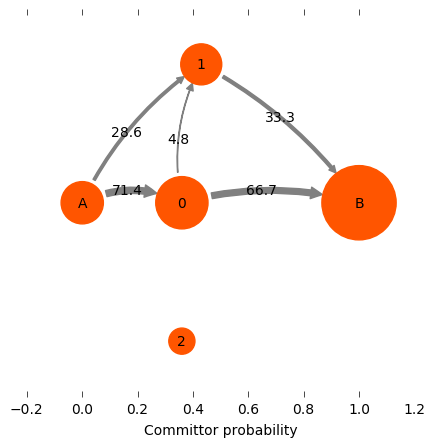

In [8]:
pyemma.plots.plot_flux(tpt, pos=pos, flux_scale=100.0/tpt.total_flux, arrow_label_format="%3.1f", max_height=5, max_width=5)

In [9]:
tpt.pathways()

([array([0, 1, 4]), array([0, 2, 4]), array([0, 1, 2, 4])],
 [0.0072033898305084295, 0.0030871670702178992, 0.00051452784503631509])

In [10]:
(paths,pathfluxes) = tpt.pathways()
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(paths)):
    cumflux += pathfluxes[i]
    print(pathfluxes[i],'\t','%3.1f'%(100.0*pathfluxes[i]/tpt.total_flux),'%\t','%3.1f'%(100.0*cumflux/tpt.total_flux),'%\t\t',paths[i])

Path flux		%path	%of total	path
0.00720338983051 	 66.7 %	 66.7 %		 [0 1 4]
0.00308716707022 	 28.6 %	 95.2 %		 [0 2 4]
0.000514527845036 	 4.8 %	 100.0 %		 [0 1 2 4]


In [11]:
(bestpaths,bestpathfluxes) = tpt.pathways(fraction=0.95)
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(bestpaths)):
    cumflux += bestpathfluxes[i]
    print(bestpathfluxes[i],'\t','%3.1f'%(100.0*bestpathfluxes[i]/tpt.total_flux),'%\t','%3.1f'%(100.0*cumflux/tpt.total_flux),'%\t\t',bestpaths[i])

Path flux		%path	%of total	path
0.00720338983051 	 66.7 %	 66.7 %		 [0 1 4]
0.00308716707022 	 28.6 %	 95.2 %		 [0 2 4]


[[ 0.          0.00720339  0.00308717  0.          0.        ]
 [ 0.          0.          0.          0.          0.00720339]
 [ 0.          0.          0.          0.          0.00308717]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


(<matplotlib.figure.Figure at 0x9b7b198>, array([[ 0.  ,  0.  ],
        [ 0.36,  0.  ],
        [ 0.43,  0.5 ],
        [ 0.36, -0.5 ],
        [ 1.  ,  0.  ]]))

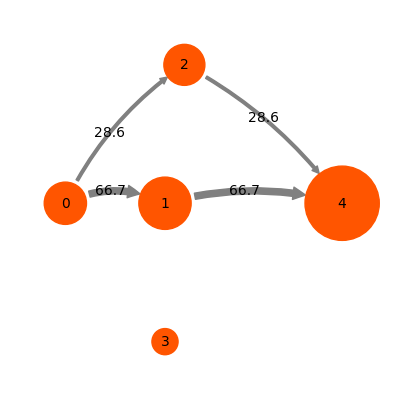

In [12]:
Fsub = tpt.major_flux(fraction=0.95)
print(Fsub)
Fsubpercent = 100.0 * Fsub / tpt.total_flux
pyemma.plots.plot_network(Fsubpercent, pos=pos, state_sizes=tpt.stationary_distribution, arrow_label_format="%3.1f", max_height=5, max_width=5)